# Objective 

The purpose of this project is to build a model to predict the status of chronic kidney disease of a patient.

ckd=chronic kidney disease

notckd=not chronic kidney disease

# Data Cleaning and Preparation

Importing libraries and dataset for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=12,8

In [2]:
data=pd.read_csv('kidney_disease.csv')

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

The column names can not be easily understood. Therefore, we would map the names from the data dictionary. Let"s read the data dictionary 

In [5]:
data_dic=pd.read_csv('data_description.txt')
data_dic.head()

,1. Features:
0,id -id
1,age -age
2,bp -blood pressure
3,sg -specific gravity
4,al -albumin


To split the abbreviation from the column name,reset the index, change the column names then map the values of the features in data dictionary to our data columns.

In [6]:
data_dic=pd.read_csv('data_description.txt', sep='-').reset_index()

In [7]:
data_dic.head()

,index,1. Features:
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin


In [8]:
data_dic.columns=['abrv','Features']

In [9]:
data_dic['Features'].values

array(['id', 'age', 'blood pressure', 'specific gravity', 'albumin',
       'sugar', 'red blood cells', ' pus cell', 'pus cell clumps',
       'bacteria', 'blood glucose random', 'blood urea',
       'serum creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed cell volume', 'white blood cell count',
       'red blood cell count', 'ypertension', 'diabetes mellitus',
       'coronary artery disease', 'appetite', 'pedal edema', 'anemia',
       'class'], dtype=object)

In [10]:
data.columns=data_dic['Features'].values

In [11]:
data.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
data.describe()

,id,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
data.shape

(400, 26)

In [14]:
data.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

There are some columns that are numerical but have object dtypes. They need to be converted to the correct dtypes.

In [15]:
def clean_data(df,col):
    df[col]=pd.to_numeric(df[col],errors='coerce')
    

In [16]:
cols=['packed cell volume','white blood cell count','red blood cell count']

for col in cols:
   clean_data(data,col)

In [17]:
data.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

To check for and handle missing values in the dataset

In [18]:
data.isnull().sum()

id                           0
age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed cell volume          71
white blood cell count     106
red blood cell count       131
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

The dataset would be splitted into numerical and categorical variables so as to traat the missing values

In [24]:
cat_data= data.select_dtypes(include='object')
num_data=data.select_dtypes(include=np.number)

In [25]:
cat_data.head()

,red blood cells,pus cell,pus cell clumps,bacteria,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [26]:
num_data.head()

,id,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6


In [27]:
cat_data.isnull().sum()

red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

To check for the unique values in the categorical dataframe

In [28]:
for col in cat_data:
    print(col, len(cat_data[col].unique()))

red blood cells 3
 pus cell 3
pus cell clumps 3
bacteria 3
ypertension 3
diabetes mellitus 6
coronary artery disease 4
appetite 3
pedal edema 3
anemia 3
class 3


In [29]:
cat_data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [30]:
for col in cat_data:
    print(f'{col} has {cat_data[col].unique()}')

red blood cells has [nan 'normal' 'abnormal']
 pus cell has ['normal' 'abnormal' nan]
pus cell clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
ypertension has ['yes' 'no' nan]
diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary artery disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
pedal edema has ['no' 'yes' nan]
anemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


There are dirtiness in our data that needs to be cleaned and the missing values filled with the highest occuring label since we have categorical data

In [31]:
cat_data['class'].replace('ckd\t','ckd',inplace=True )
cat_data['diabetes mellitus'].replace({' yes':'yes'},inplace=True )
cat_data['coronary artery disease'].replace('\tno','no',inplace=True )

In [32]:
cat_data['red blood cells'].value_counts()

normal      201
abnormal     47
Name: red blood cells, dtype: int64

In [33]:
for col in cat_data:
    cat_data[col]=cat_data[col].fillna(cat_data[col].mode()[0])

In [34]:
cat_data.isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

To handle missing values in the numerical dataframe and replace with the mean

In [35]:
num_data.isnull().sum()

id                          0
age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [36]:
for col in num_data:
    num_data[col]=num_data[col].fillna(num_data[col].mean())

In [37]:
num_data.isnull().sum()

id                        0
age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

To check for outliers in our dataset

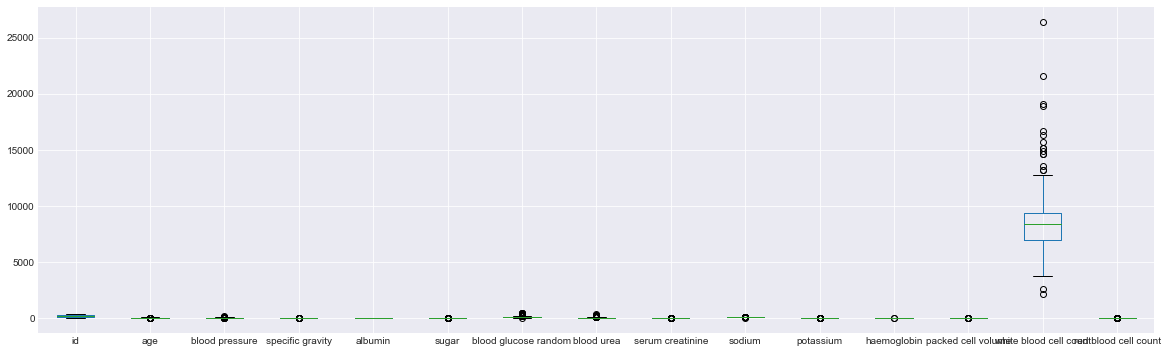

In [38]:
num_data.boxplot(figsize=(20,6))

There are outliers present in the white blood cell count column

# Exploratory Data Analysis

To check the distribution of patients with and without chronic diease. 

[]

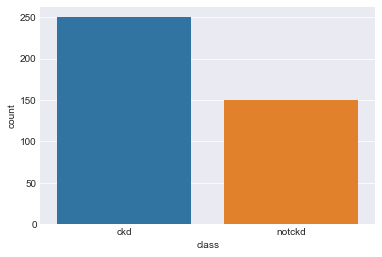

In [40]:
sns.countplot(data=cat_data, x='class')
plt.plot()

To check distribution across the numerical features

In [41]:
len(num_data.columns)

15

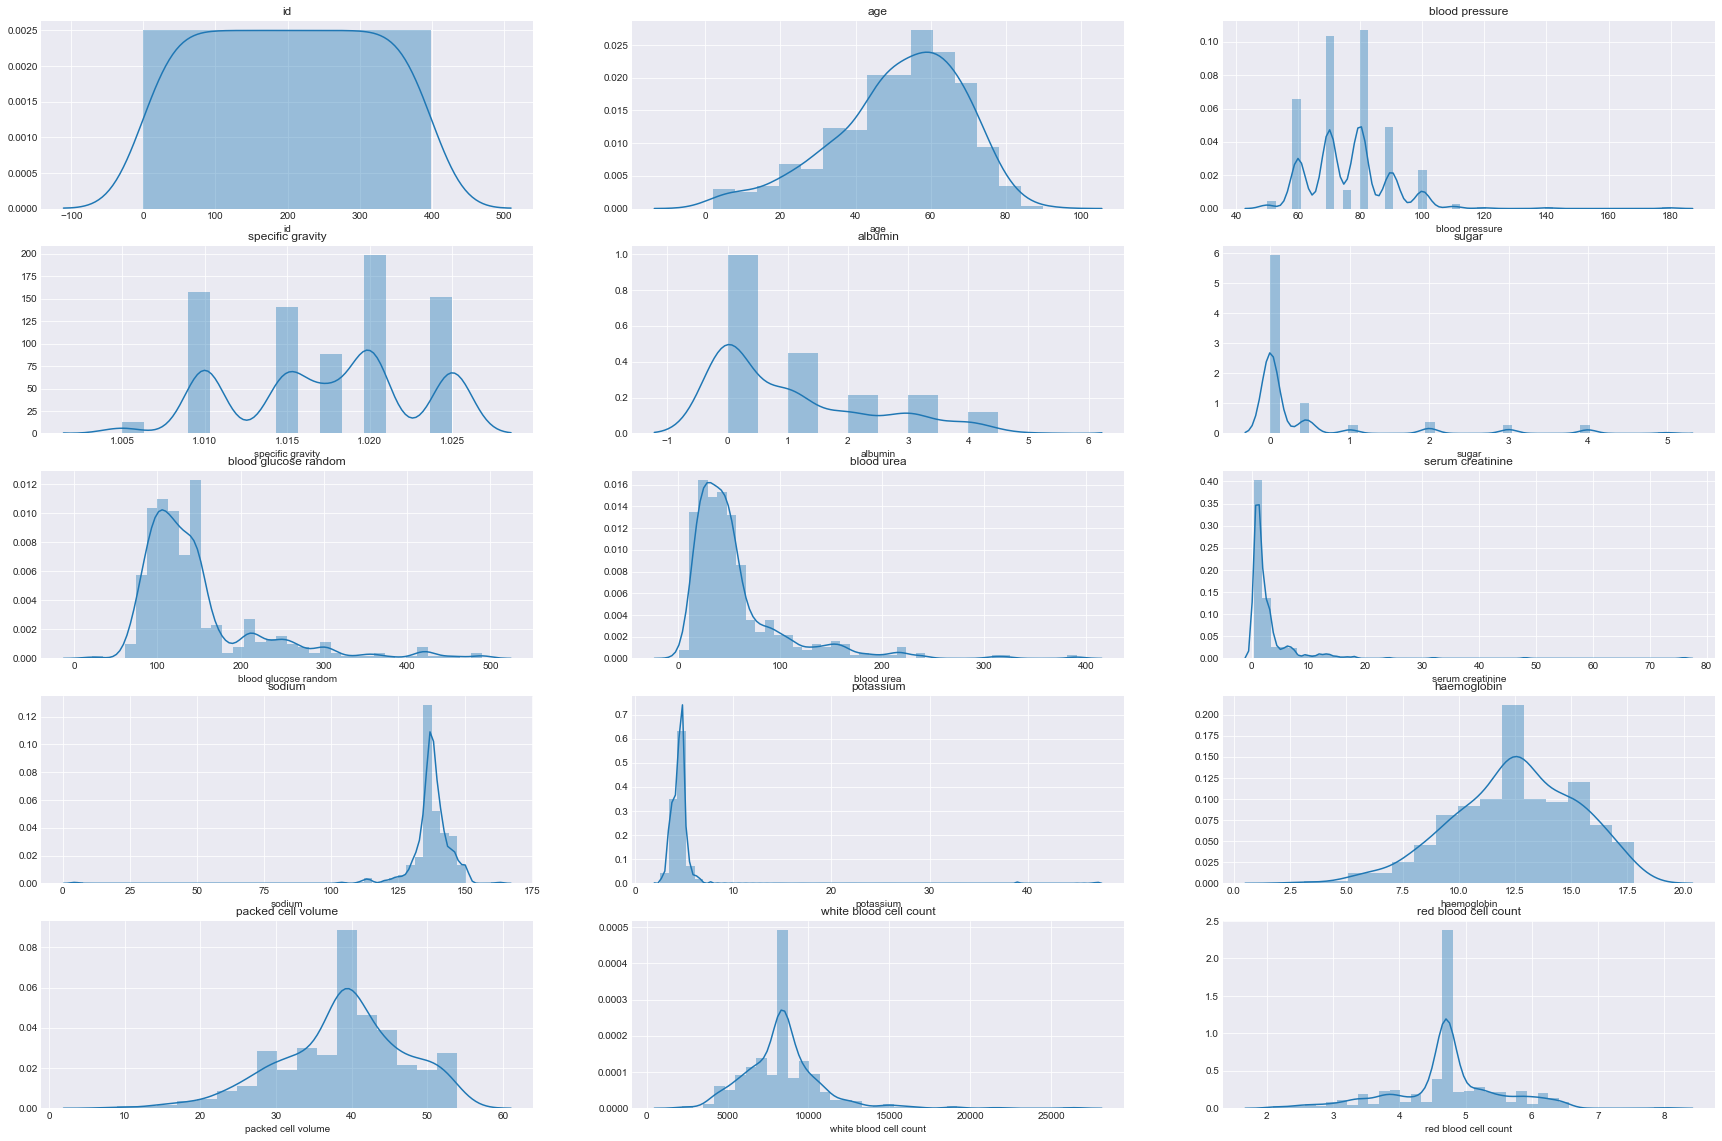

In [42]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_data):
    plt.subplot(5,3,i+1)
    sns.distplot(num_data[feature])
    plt.title(feature)
   

To check for distribution in the categorical variables

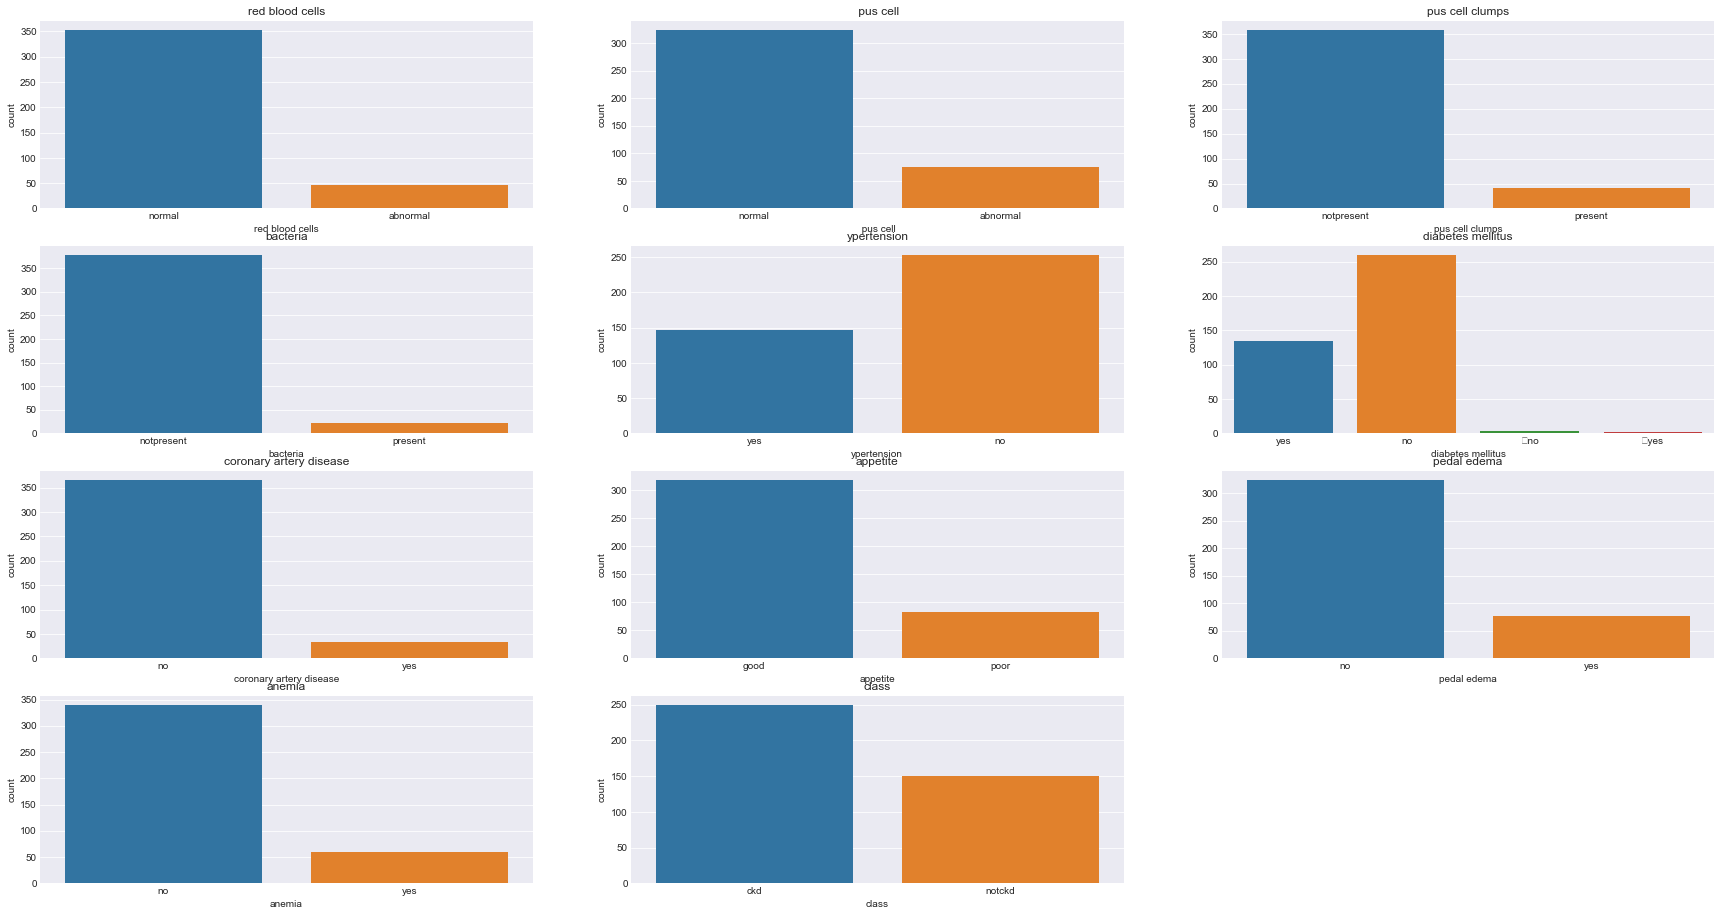

In [43]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(cat_data):
    plt.subplot(5,3,i+1)
    sns.countplot(cat_data[feature])
    plt.title(feature)

Relationships

To check for the relationship between the some variables and target variable

In [44]:
num_data.columns

Index(['id', 'age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count'],
      dtype='object')

In [45]:
new_data=pd.concat([cat_data,num_data],axis=1)

In [46]:
new_data.isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
id                         0
age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed cell volume         0
white blood cell count     0
red blood cell count       0
dtype: int64

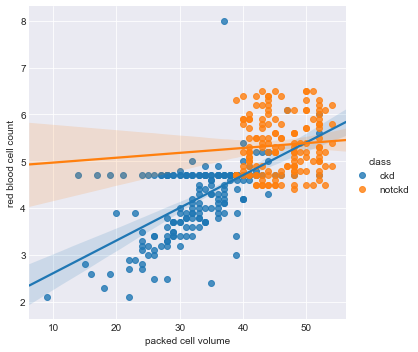

In [47]:
sns.lmplot(x='packed cell volume', y='red blood cell count',data=new_data,hue='class')

To automate our relationships

In [48]:
def scatters(col1,col2):
    sns.lmplot(x=col1, y=col2,data=new_data,hue='class')
    plt.title(f'{col1} by {col2}')
    plt.show()

In [49]:
new_data.columns

Index(['red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'ypertension', 'diabetes mellitus', 'coronary artery disease',
       'appetite', 'pedal edema', 'anemia', 'class', 'id', 'age',
       'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count'],
      dtype='object')

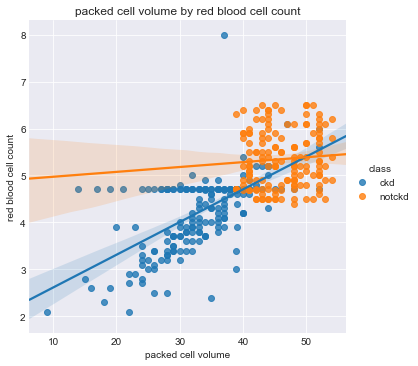

In [50]:
scatters('packed cell volume','red blood cell count')

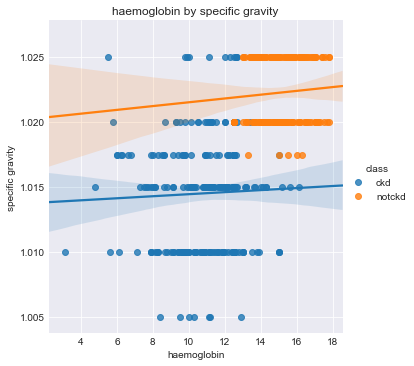

In [51]:
scatters('haemoglobin','specific gravity')

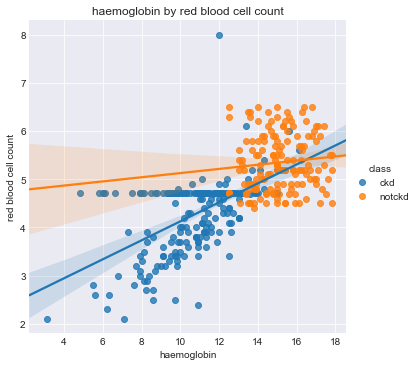

In [52]:
scatters('haemoglobin','red blood cell count')

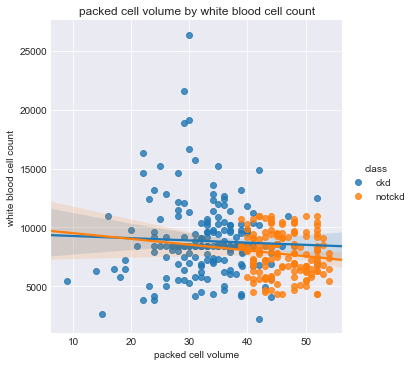

In [53]:
scatters('packed cell volume', 'white blood cell count')

Patients that do not have this disease have a high pcv and low white blood cell count. Majority of Patients with ckd have low pcv with some having a high white blood cell count. 

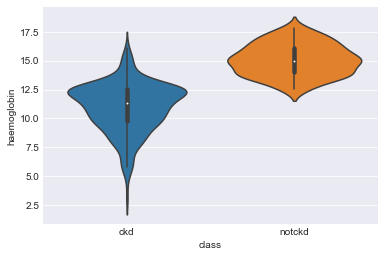

In [54]:
sns.violinplot(data=new_data, y='haemoglobin', x='class')

In [55]:
def violin(col):
    sns.violinplot(data=new_data, y=col, x='class')
    plt.title(f'{col} by class')
    plt.show()
    

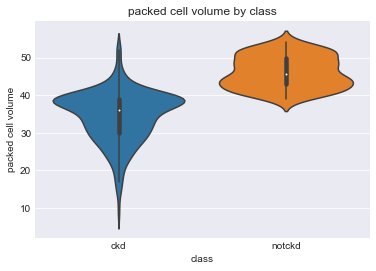

In [56]:
violin('packed cell volume')

Patients without ckd have a high pcv compared to those with ckd.

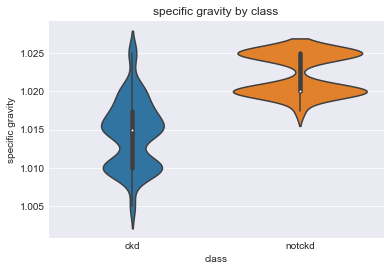

In [57]:
violin('specific gravity')

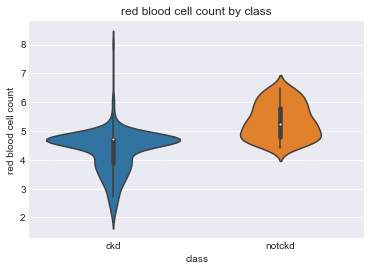

In [58]:
violin('red blood cell count')

Patients with chronic kidney diseases have a very low and high red blood cell counts. Majority of people without the condition have red blood cell count ranging between 4-7. Extreme values can be seen for people with the disease.

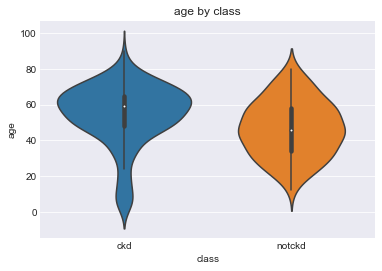

In [59]:
violin('age')

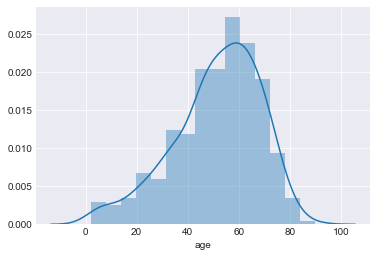

In [61]:
sns.distplot(new_data.age)

Correlation among features in the data

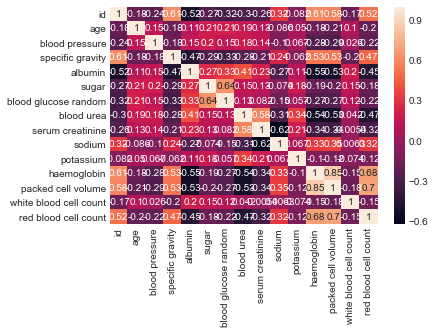

In [63]:
corr=new_data.corr()
sns.heatmap(corr, annot=True)

Correlation of variables with target

In [64]:
new_data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [65]:
new_data['class']=new_data['class'].map({'ckd':0,'notckd':1})

In [66]:
new_data.drop('id',axis=1, inplace=True)

In [67]:
nume=new_data.select_dtypes(include=np.number)
num=nume.corr()
num['class'].sort_values(ascending=False).to_frame()

,class
class,1.000000
haemoglobin,0.729628
specific gravity,0.698957
packed cell volume,0.690060
red blood cell count,0.590913
sodium,0.342288
potassium,-0.076921
white blood cell count,-0.205274
age,-0.225405
blood pressure,-0.290600


Variables like haemoglobin,specific gravity,packed cell volume are highly correlated with the target. The variables with high correlation to the target have been visualized and analyzed above. Let us check the effect of negatively correlated variables with our target

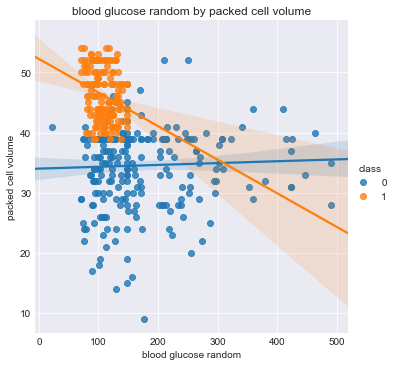

In [68]:
scatters('blood glucose random', 'packed cell volume')

Patients without the disease have a high pcv and low blood glucose random

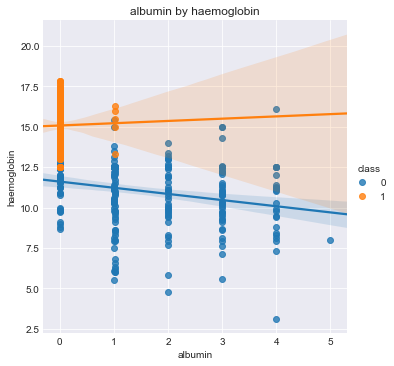

In [69]:
scatters('albumin', 'haemoglobin')

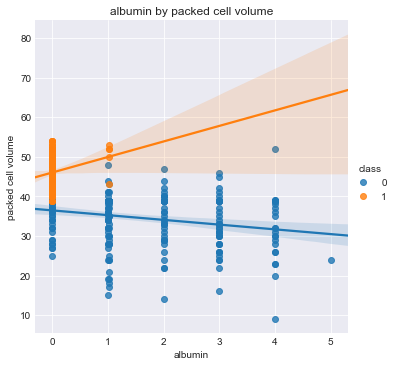

In [70]:
scatters('albumin', 'packed cell volume')

# Building the machine learning models

In [71]:
new_data.head()

,red blood cells,pus cell,pus cell clumps,bacteria,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,...,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000


Feature encoding

In [72]:
cat_data.nunique()

red blood cells            2
 pus cell                  2
pus cell clumps            2
bacteria                   2
ypertension                2
diabetes mellitus          4
coronary artery disease    2
appetite                   2
pedal edema                2
anemia                     2
class                      2
dtype: int64

There are two unique values for each categorical column, since we have such a low number, the features would be encoded using label encoder

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()      

In [74]:
for col in cat_data:
    cat_data[col]=le.fit_transform(cat_data[col])

In [75]:
cat_data

,red blood cells,pus cell,pus cell clumps,bacteria,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,1,1,0,0,1,3,0,0,0,0,0
1,1,1,0,0,0,2,0,0,0,0,0
2,1,1,0,0,0,3,0,1,0,1,0
3,1,0,1,0,1,2,0,1,1,1,0
4,1,1,0,0,0,2,0,0,0,0,0
5,1,1,0,0,1,3,0,0,1,0,0
6,1,1,0,0,0,2,0,0,0,0,0
7,1,0,0,0,0,3,0,0,1,0,0
8,1,0,1,0,1,3,0,0,0,1,0
9,0,0,1,0,1,3,0,1,0,1,0


In [76]:
Data=pd.concat([cat_data, num_data], axis=1)

In [77]:
Data.head()

,red blood cells,pus cell,pus cell clumps,bacteria,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,...,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
0,1,1,0,0,1,3,0,0,0,0,...,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,1,1,0,0,0,2,0,0,0,0,...,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,1,1,0,0,0,3,0,1,0,1,...,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,1,0,1,0,1,2,0,1,1,1,...,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,1,1,0,0,0,2,0,0,0,0,...,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000


Feature Selection 

To select features that best contributes to our model we need to split into X and y variables

In [78]:
y=Data['class']

In [79]:
X=Data.drop('class', axis=1)

In [80]:
X=Data.drop('id', axis=1)

In [81]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [82]:
features=SelectFromModel(Lasso(alpha=0.01,random_state=0))

In [83]:
features.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [85]:
Columns=X.columns

In [86]:
selected_features=Columns[features.get_support()]

In [87]:
selected_features

Index(['class', 'age', 'blood pressure', 'albumin', 'blood glucose random',
       'sodium', 'haemoglobin', 'packed cell volume'],
      dtype='object')

In [88]:
X=Data[['age', 'blood pressure', 'albumin',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
        'haemoglobin', 'packed cell volume']]

In [89]:
X.head()

,age,blood pressure,albumin,blood glucose random,blood urea,serum creatinine,sodium,haemoglobin,packed cell volume
0,48.0,80.0,1.0,121.000000,36.0,1.2,137.528754,15.4,44.0
1,7.0,50.0,4.0,148.036517,18.0,0.8,137.528754,11.3,38.0
2,62.0,80.0,2.0,423.000000,53.0,1.8,137.528754,9.6,31.0
3,48.0,70.0,4.0,117.000000,56.0,3.8,111.000000,11.2,32.0
4,51.0,80.0,2.0,106.000000,26.0,1.4,137.528754,11.6,35.0


Standardization

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
ss=StandardScaler()
x=ss.fit_transform(X)

Splitting data into train and test

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=0)

Models

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [94]:
models=[]

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Support Vector', SVC()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Naive Bayes',GaussianNB()))

In [95]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    
    from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score
    print(accuracy_score(prediction,y_test))
    print(roc_auc_score(prediction,y_test))
    print(confusion_matrix(prediction,y_test))
    print('\n')

Logistic Regression
0.97
0.9634146341463414
[[59  0]
 [ 3 38]]


Decision Tree
0.94
0.9363327674023769
[[59  3]
 [ 3 35]]


Random Forest
0.98
0.975
[[60  0]
 [ 2 38]]


Support Vector
0.97
0.9634146341463414
[[59  0]
 [ 3 38]]


KNN
0.97
0.9634146341463414
[[59  0]
 [ 3 38]]


Naive Bayes
0.95
0.9491634491634492
[[60  3]
 [ 2 35]]




Random Forest had the highest model accuracy.